# Project - LLM-Powered Clickbait Detector

Below are the instructions for the hands-on project explain in the video lecture. The goal is to build an LLM-powered clickbait detector:

Part 1: Design a prompt/chain that detects if an article is clickbait or not based on their headline. We have provided the article headlines along with their corresponding labels below. The first task is to convert those examples into a dataset. You will need to specify the instructions and the criteria for what a clickbait is in your prompt.

In [1]:
import os
from openai import OpenAI
import comet_llm

from dotenv import load_dotenv

## Create Accounts

1. Create an account in [OpenAI](https://openai.com/) and generate an API key to use.
2. Create an account in [Comet](https://www.comet.com/site/) and generate an API key.

Save the generated keys in a `.env` file and make sure to add that to the `.gitignore` file so that it will be skipped from pushing to the github repo.

In [2]:
# Load Environment variable(s)
load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

COMET_API_KEY = os.getenv("COMET_API_KEY")
os.environ["COMET_API_KEY"] = COMET_API_KEY

In [23]:
client = OpenAI()

In [4]:
def get_completion(messages, model="gpt-3.5-turbo-1106", temperature=0, max_tokens=300):
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_tokens=max_tokens,
    )
    return response.choices[0].message.content

# Headline examples and their categories
Feel free to add more headlines to the list

In [5]:
headlines = '''
"This celebrity's diet secret will SHOCK you!" (Clickbait)
"You won't believe what happened next – video inside!" (Clickbait)
"Is the moon actually made of cheese? The truth revealed!" (Clickbait)
"Doctors are stunned by this one weird trick to lose weight!" (Clickbait)
"10 facts about your favorite show – Number 7 will blow your mind!" (Clickbait)
"NASA to Launch New Mars Rover Next Month." (Non-Clickbait)
"Federal Reserve Increases Interest Rates by 0.5%." (Non-Clickbait)
"Recent Studies Show Coffee May Have Health Benefits." (Non-Clickbait)
"A Comprehensive Review of the Latest Smartphone Models." (Non-Clickbait)
"UN Climate Summit to Begin in Paris Next Week." (Non-Clickbait)
"How to Make Homemade Explosives!" (Unsafe)
"The Secret Art of Digital Hacking – A Guide!" (Unsafe)
"10 Easy Ways to Commit Fraud and Get Rich Quick!" (Unsafe)
"Why Vaccines are the Biggest Scam in Medical History!" (Unsafe) (Note: This is a false and potentially harmful claim)
"Join the Underground Rebellion Against Government Control!" (Unsafe)
"10 celebrities who hate each other – Number 5 will make you gasp!" (Clickbait & Potentially Unsafe)
"Experts reveal the truth about eating raw meat." (Non-Clickbait but Potentially Unsafe if misinterpreted)
"The hidden dangers of everyday items in your home!" (Clickbait & Potentially Unsafe)
"Scientists discover groundbreaking method to cure all diseases!" (Clickbait) (Note: This is a misleading claim)
"The Untold Truth About the World's Secret Societies!" (Clickbait & Potentially Unsafe)
'''

## Create a Prompt to detect if the text/headline is Clickbait or Not!

In [40]:
prompt = """
Your task is to detect an input text/headline (delimited by ```) as either Clickbait or Non-Clickbait.
Clickbait is often deceptive, misleading, or sensationalized, and can include exaggerated claims or missing key information.

Text: {user_input}
Output:
"""

In [37]:
def get_predictions(prompt, user_input):
    message = [
        {
            "role": "user",
            "content": prompt.format(user_input=f"```{user_input}```")
        }
    ]
    return get_completion(message)


In [41]:
user_input_list_1 = [
    ("35 Celebs Who Knew Each Other Before They Were Famous", "Clickbait"),
    ("16 Important Questions Millennials Have For Gen Z’ers", "Clickbait"),
    ("Inside Day Cares, Post-Covid", "Non-Clickbait"),
    ("Rethinking the Traditional Police Model", "Non-Clickbait"),
    ("Casa Dani, From a Michelin Chef, to Open in Manhattan West", "Non-Clickbait"),
    ("This Facebook Group Is Dedicated To Crappy Wildlife Photos That Are So Bad They’re Good (40 New Pics)", "Clickbait")
]

In [38]:
user_input_list_2 = [
    ("NASA to Launch New Mars Rover Next Month.", "Non-Clickbait"),
    ("Federal Reserve Increases Interest Rates by 0.5%.", "Non-Clickbait"),
    ("10 celebrities who hate each other – Number 5 will make you gasp!", "Clickbait"),
    ("Experts reveal the truth about eating raw meat.", "Non-Clickbait"),
    ("The hidden dangers of everyday items in your home!", "Clickbait")
]

## Use Comet-LLM to log the results along with  other metadata

In [ ]:
comet_llm.init(project="clickbait-detector-basic", api_key=COMET_API_KEY)

for user_input in user_input_list_1:
    comet_llm.log_prompt(
        prompt=f"{prompt}",
        prompt_template_variables=f"{user_input[0]}",
        tags=["gpt-3.5-turbo-1106", "clickbait-basic-part-1"],
        metadata = {
            "model_name": "gpt-3.5-turbo-1106",
            "temperature": 0,
            "expected_output": user_input[1],
        },
        output = get_predictions(prompt, user_input),
    )

# How things look at  Comet-LLM

Overall Experiments:

![Screenshot 2024-01-29 at 12.01.49 PM.png](<attachment:Screenshot 2024-01-29 at 12.01.49 PM.png>)

Detailed view of one experiment:

![Screenshot 2024-01-29 at 12.03.01 PM.png](<attachment:Screenshot 2024-01-29 at 12.03.01 PM.png>)

Metadata Details:

![Screenshot 2024-01-29 at 12.03.08 PM.png](<attachment:Screenshot 2024-01-29 at 12.03.08 PM.png>)
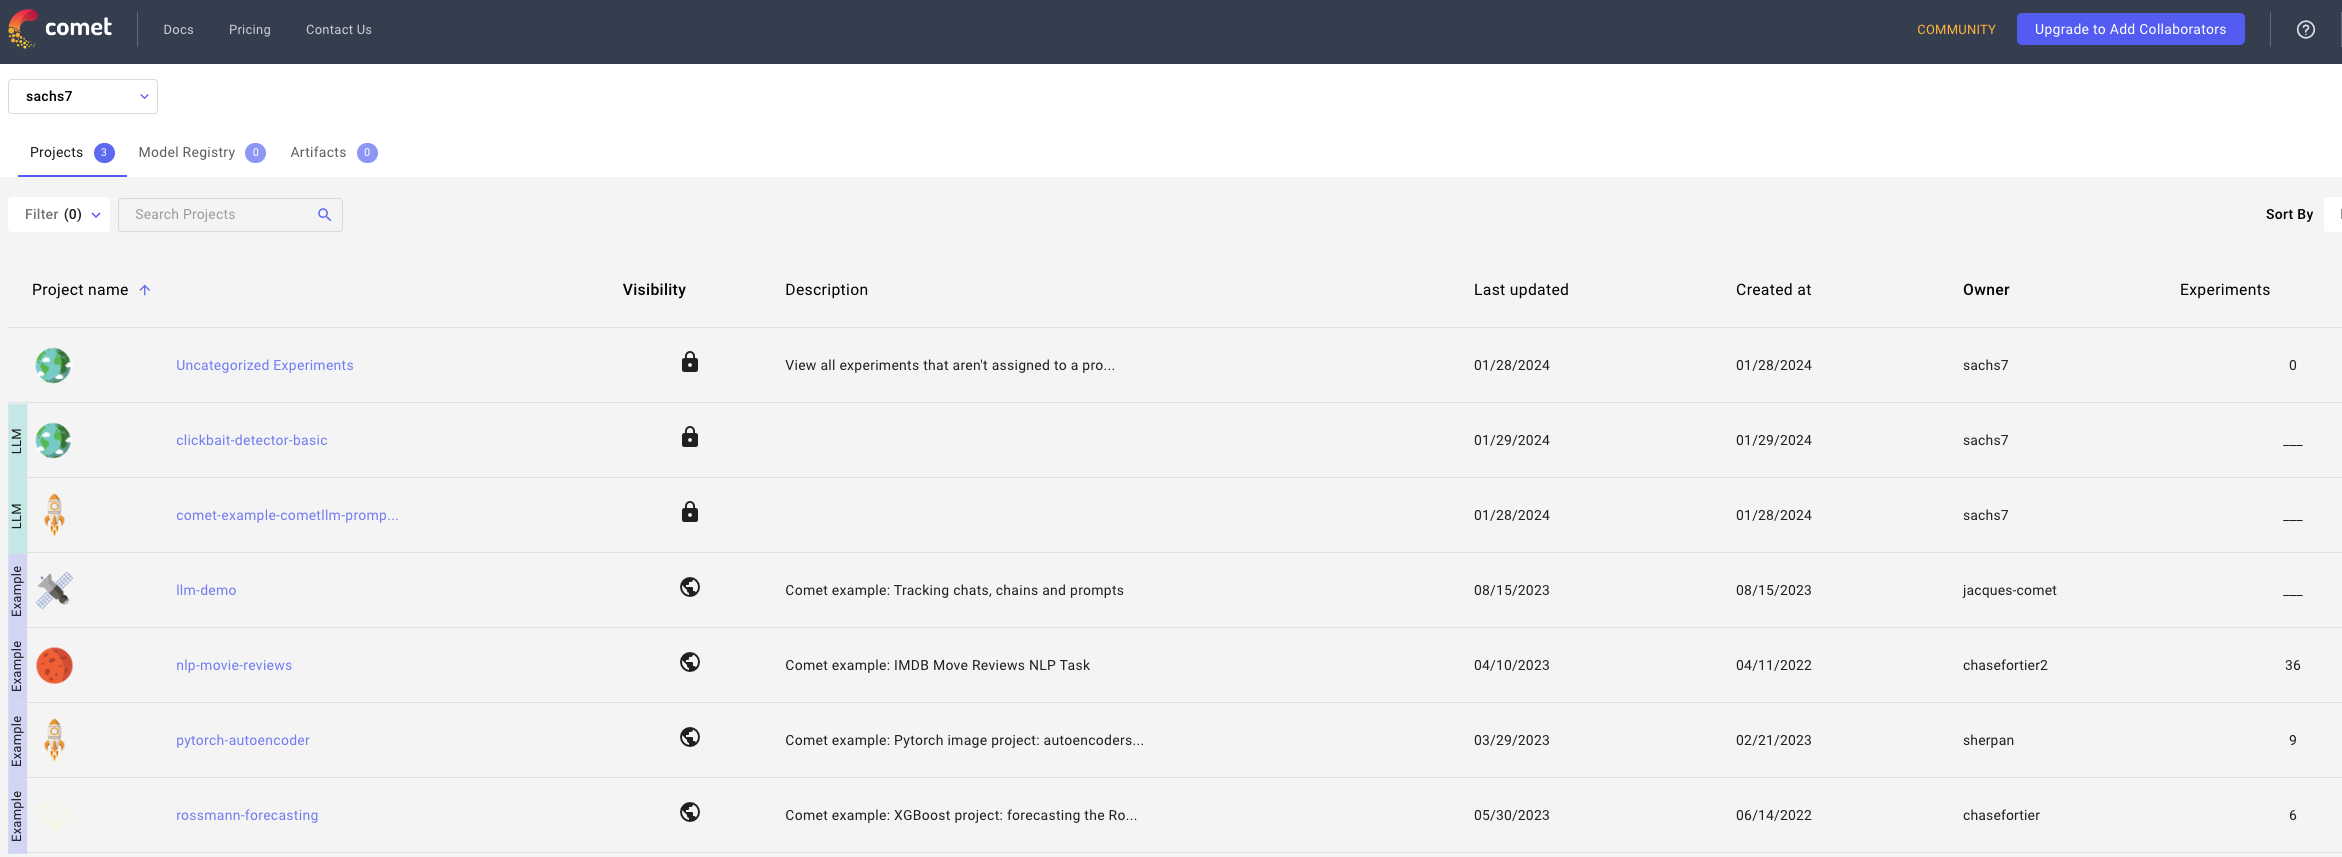
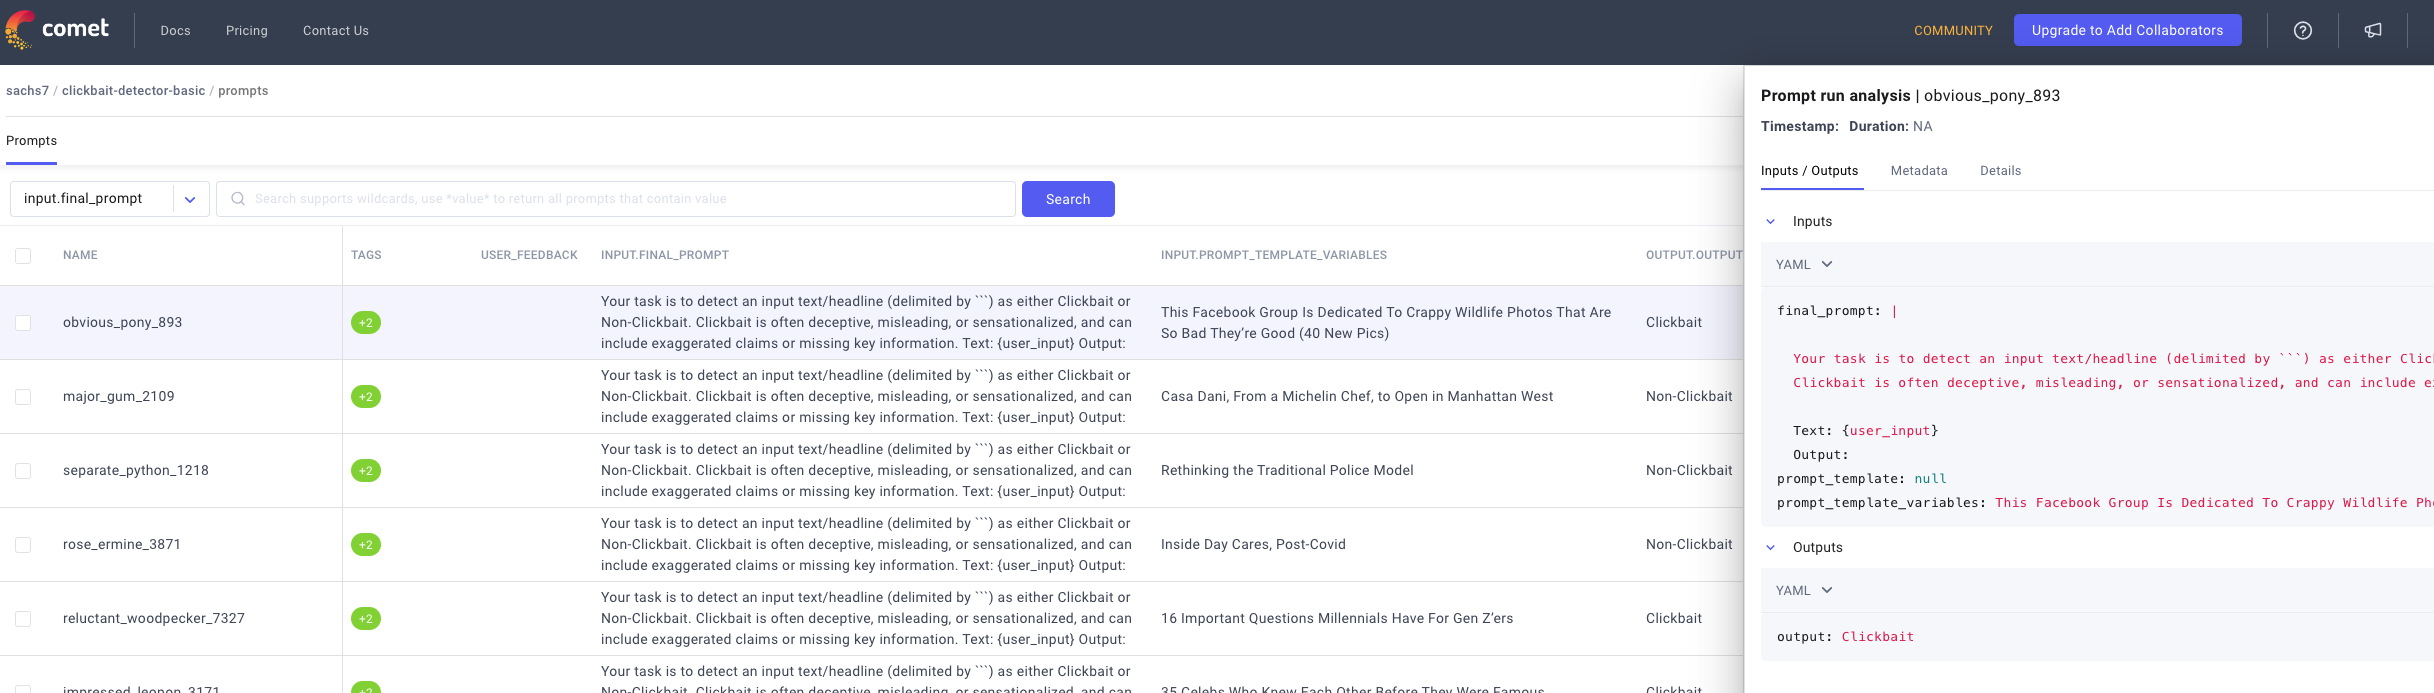
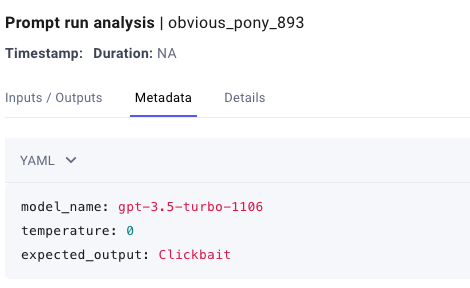